<h1 style="font-family: Italic; font-size:2;color:Maroon;">The goal of the project is to determine fraudulent transactions from the dataset and find the right algorithm that helps determine future fraudulent transactions with highest accuracy </h1>

## Importing Basic Libraries and Loading File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Out of all the columns , Time seems to be irrelavant for our analysis and our focus column is class which already seems label encoded

In [3]:
# remove unwanted column
df.drop('Time',axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

## It can be seen that there are no null values as well as no object type data
## Amount being a guide to transaction we check variablity in the data
## Also Checking number of fradulent and genuine transactions

In [5]:
# amount variability check
a= min(df.Amount)
b= max(df.Amount)
print('Minimum Transaction Amount',a)
print('Maximum Transaction Amount',b)

Minimum Transaction Amount 0.0
Maximum Transaction Amount 25691.16


In [6]:
# there appears a vast difference in the min and max value which may affect the result, therefore using StandardScaler to remove this vast difference
from sklearn.preprocessing import StandardScaler
# object creation
ss = StandardScaler()
# applying to Amount
amount = df['Amount'].values
df['Amount'] = ss.fit_transform(amount.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


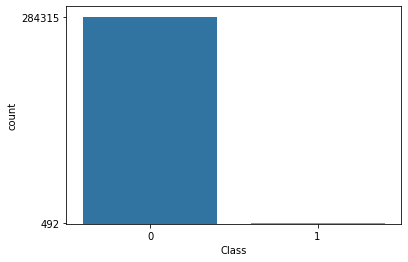

In [7]:
# Now that amount has been scaled, we check genuine and fraudulent transactions which will fetch us an hollistic image
plt.figure()
sns.countplot(data=df,x="Class") # 0 - Genuine , 1 - Fraud
c=df["Class"].value_counts() # new object to get exact numbers on Y-axis
plt.yticks(c)
plt.show()

## From the above plot we can see that the number of fraudulent transactions is insubstantial w.r.t Genuine transactions

In [8]:
# removing duplicates
print('Before duplicate data removal',df.shape)
df.drop_duplicates(inplace=True)
print('After duplicate data removal',df.shape)

Before duplicate data removal (284807, 30)
After duplicate data removal (275663, 30)


In [9]:
df.dropna()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249,0


<h1 style="font-family: Italic; font-size:2em;color:Maroon;"> Model Building </h1>

In [10]:
# Splitting the data
x = df.drop('Class',axis=1) # input
y = df['Class'] # target

## train_test_split

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
ros = RandomOverSampler()
#apply randomoversampling for balance
X_train,Y_train=ros.fit_resample(x_train,y_train)

In [14]:
#apply randomoversampling for balance
X_test,Y_test=ros.fit_resample(x_test,y_test)

In [15]:
# creating function to break monotony
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def create_model(model):
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(classification_report(Y_test,Y_pred))
    print('Confusion Matrix')
    print(confusion_matrix(Y_test,Y_pred))
    return model

## Baseline Model : Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
#creating object of LogisticRegression class
lr=LogisticRegression()

In [17]:
lr = create_model(lr)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     68788
           1       0.97      0.91      0.94     68788

    accuracy                           0.94    137576
   macro avg       0.94      0.94      0.94    137576
weighted avg       0.94      0.94      0.94    137576

Confusion Matrix
[[67171  1617]
 [ 6275 62513]]


In [18]:
# The recall being 91%

## Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
# DecisionTreeClassifier object creation - entropy
dt = DecisionTreeClassifier(max_depth=6,criterion='entropy') # by using entropy method
# training the model again
dt = create_model(dt) # calling the function

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     68788
           1       0.97      0.82      0.89     68788

    accuracy                           0.90    137576
   macro avg       0.91      0.90      0.90    137576
weighted avg       0.91      0.90      0.90    137576

Confusion Matrix
[[67057  1731]
 [12113 56675]]


In [21]:
# The recall is 82% for entropy

## SVM Model

In [22]:
from sklearn.svm import LinearSVC, SVC

In [23]:
svc = LinearSVC()

In [24]:
# call the function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.92      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confusion Matrix
[[67331  1457]
 [ 5751 63037]]


In [25]:
# Now Linear seperable by soft margin
svc = LinearSVC(random_state=1,C=0.05)

In [26]:
# call the function
svc = create_model(svc)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     68788
           1       0.98      0.92      0.95     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confusion Matrix
[[67449  1339]
 [ 5751 63037]]


## Random Forest Classifier & Stacking Classifier

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [28]:
# creating object
rfc = RandomForestClassifier(n_estimators=10,max_features=9,random_state=1)
# max_features < 10

In [29]:
# calling function
model = create_model(rfc)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     68788
           1       1.00      0.72      0.84     68788

    accuracy                           0.86    137576
   macro avg       0.89      0.86      0.86    137576
weighted avg       0.89      0.86      0.86    137576

Confusion Matrix
[[68780     8]
 [19089 49699]]


In [30]:
# Stacking Classifier
from mlxtend.classifier import StackingClassifier

In [31]:
#Naive Aggregation
# Create object of LR , DT(E) , DT(G)
lr = LogisticRegression()
dt1 = DecisionTreeClassifier() # gini by default
dt2 = DecisionTreeClassifier(criterion='entropy')

In [32]:
# model list creation
model_list = [lr,dt1,dt2]

In [33]:
# using meta classifier , select meta algo for meta classifier : can use any
meta=LogisticRegression()

In [34]:
#Create the object of StackingClassifier class and passing the no. of arguments
sc=StackingClassifier(classifiers=model_list,meta_classifier=meta)

In [35]:
#call function
model=create_model(sc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     68788
           1       1.00      0.75      0.85     68788

    accuracy                           0.87    137576
   macro avg       0.90      0.87      0.87    137576
weighted avg       0.90      0.87      0.87    137576

Confusion Matrix
[[68761    27]
 [17474 51314]]


## Bagging and Boosting Technique

In [36]:
# Bagging
from sklearn.ensemble import BaggingClassifier

In [37]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=50,random_state=1)

In [38]:
model=create_model(bc)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93     68788
           1       0.98      0.86      0.92     68788

    accuracy                           0.92    137576
   macro avg       0.93      0.92      0.92    137576
weighted avg       0.93      0.92      0.92    137576

Confusion Matrix
[[67771  1017]
 [ 9426 59362]]


In [39]:
#pasting
bc1= BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=500,random_state=1,bootstrap=False) #means pasting 

In [40]:
model=create_model(bc1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     68788
           1       0.97      0.92      0.94     68788

    accuracy                           0.95    137576
   macro avg       0.95      0.95      0.95    137576
weighted avg       0.95      0.95      0.95    137576

Confusion Matrix
[[67032  1756]
 [ 5772 63016]]


In [41]:
# ADA Booster
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada= AdaBoostClassifier(n_estimators=80) # n_estimators should be <=100
#AdaBoost create a decision stump means understood use model DecisionTreeClassifier
#call function
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92     68788
           1       0.99      0.85      0.91     68788

    accuracy                           0.92    137576
   macro avg       0.93      0.92      0.92    137576
weighted avg       0.93      0.92      0.92    137576

Confusion Matrix
[[68207   581]
 [10565 58223]]


In [43]:
# Xtreme Gradient Boosting
from xgboost import XGBClassifier

In [44]:
# create object of XGBClassifier class and passing the parameter
xg = XGBClassifier(n_estimators=30,reg_alpha=1) # reg_alpha is handling automatic overfitting : reg means regularation and alpha or lambda : hyperparameter

In [45]:
#call function
model=create_model(xg)

[23:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     68788
           1       1.00      0.80      0.89     68788

    accuracy                           0.90    137576
   macro avg       0.92      0.90      0.90    137576
weighted avg       0.92      0.90      0.90    137576

Confusion Matrix
[[68765    23]
 [13771 55017]]


-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|

<h1 style="font-family: Italic; font-size:2;color:Maroon;">From the above tests , it can be seen Pasting and LinearSVC is the best model for the given dataset with a recall of 92% </h1>